In [51]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Read in merged csv file and display data
ins_claim_fraud = pd.read_csv("CSV Files/insurance_claims_data.csv")
ins_claim_fraud.head()

,DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,VENDOR ADDRESS_LINE1,VENDOR ADDRESS_LINE2,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
0,6/1/2020 0:00,TXN00000001,A00003822,PLC00008468,6/23/2015,5/16/2020,5/21/2020,Health,157.13,9000,...,TN,37217,35441155,LRZO53254369804934,Ramsey Inc,3114 West 20th Court,NaN,Panama City,FL,32405.0
1,6/10/2020 0:00,TXN00000258,A00003072,PLC00008557,2/15/2014,5/27/2020,6/1/2020,Life,57.15,54000,...,TN,37217,35441155,LRZO53254369804934,NaN,NaN,NaN,NaN,NaN,NaN
2,9/7/2020 0:00,TXN00002428,A00001447,PLC00004391,1/30/2015,8/23/2020,8/28/2020,Life,65.06,13000,...,TN,37217,35441155,LRZO53254369804934,NaN,NaN,NaN,NaN,NaN,NaN
3,9/22/2020 0:00,TXN00002811,A00001822,PLC00009369,8/22/2012,9/6/2020,9/11/2020,Life,87.16,42000,...,TN,37217,35441155,LRZO53254369804934,NaN,NaN,NaN,NaN,NaN,NaN
4,9/24/2020 0:00,TXN00002861,A00006019,PLC00006747,2/5/2017,9/14/2020,9/17/2020,Mobile,11.85,500,...,TN,37217,35441155,LRZO53254369804934,Lewis Ltd,204 North Holt Street,NaN,Montgomery,AL,36104.0


In [3]:
# Display last 5 rows in csv
ins_claim_fraud.tail()

,DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,VENDOR ADDRESS_LINE1,VENDOR ADDRESS_LINE2,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
9995,4/28/2021 0:00,TXN00008381,A00006144,PLC00005140,10/23/2012,4/15/2021,4/20/2021,Life,64.16,93000,...,CT,6040,55484383,CLKD05622028357384,"Reed, Bartlett and Miles",37 East Broad Street,NaN,Savannah,GA,31401.0
9996,5/2/2021 0:00,TXN00008462,A00004250,PLC00009507,8/30/2019,4/20/2021,4/25/2021,Mobile,9.76,300,...,CT,6040,55484383,CLKD05622028357384,NaN,NaN,NaN,NaN,NaN,NaN
9997,6/8/2021 0:00,TXN00009410,A00004412,PLC00005536,11/25/2019,6/5/2021,6/5/2021,Motor,97.78,3000,...,CT,6040,55484383,CLKD05622028357384,Dennis LLC,511 Norton Avenue,NaN,Nashville,TN,37207.0
9998,6/21/2021 0:00,TXN00009756,A00003267,PLC00007273,9/29/2012,6/1/2021,6/6/2021,Mobile,7.64,200,...,CT,6040,55484383,CLKD05622028357384,"Dawson, Taylor and Chavez",756 Neponset Street,NaN,Norwood,MA,2062.0
9999,5/11/2021 0:00,TXN00008671,A00006937,PLC00007149,1/11/2016,5/8/2021,5/8/2021,Life,73.51,49000,...,CT,6040,118343345,HEWS38892486083575,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
incident_cities_unique = len(ins_claim_fraud["INCIDENT_CITY"].unique())
incident_cities_unique

407

In [5]:
incident_count = ins_claim_fraud["INCIDENT_CITY"].value_counts()
incident_count

INCIDENT_CITY
Manchester    606
Washington    594
Montgomery    584
Glendale      582
Arvada        558
             ... 
Soquel          1
Fair Haven      1
East Haven      1
Norwood         1
Longmeadow      1
Name: count, Length: 406, dtype: int64

In [75]:
incident_state_unique = len(ins_claim_fraud["INCIDENT_STATE"].unique())
incident_state_unique

16

In [6]:
incident_state_count = ins_claim_fraud["INCIDENT_STATE"].value_counts()
incident_state_count


INCIDENT_STATE
CA    1048
CO     707
FL     689
AZ     637
CT     619
AL     612
MD     597
GA     592
DC     587
OK     582
AR     581
TN     581
MA     576
KY     536
AK     529
VT     527
Name: count, dtype: int64

In [7]:
incident_hour_unique = len(ins_claim_fraud["INCIDENT_HOUR_OF_THE_DAY"].unique())
incident_hour_unique

24

In [8]:
incident_hour_count = ins_claim_fraud["INCIDENT_HOUR_OF_THE_DAY"].value_counts()
incident_hour_count

INCIDENT_HOUR_OF_THE_DAY
15    462
6     461
18    445
17    441
22    440
10    436
5     434
19    430
9     414
14    413
16    411
11    411
13    409
21    404
0     404
2     403
8     403
20    402
4     402
12    402
23    401
3     395
7     394
1     383
Name: count, dtype: int64

In [9]:
vender_unique = len(ins_claim_fraud["VENDOR_NAME"].unique())
vender_unique

404

In [10]:
vender_count = ins_claim_fraud["VENDOR_NAME"].value_counts()
vender_count

VENDOR_NAME
Thompson Inc                      38
Anderson Inc                      35
Garcia PLC                        31
Hill LLC                          31
Hicks, Patton and Cook            28
                                  ..
Ortega-Michael                     9
Johnson, Hernandez and Mcguire     9
Watkins Inc                        9
Knight-Ortiz                       8
Miller, Perez and Cannon           6
Name: count, Length: 403, dtype: int64

In [11]:
police_rep_count = ins_claim_fraud["POLICE_REPORT_AVAILABLE"].value_counts()
police_rep_count

POLICE_REPORT_AVAILABLE
1    6928
0    3072
Name: count, dtype: int64

In [12]:
injury_count = ins_claim_fraud["ANY_INJURY"].value_counts()
injury_count

ANY_INJURY
1    6991
0    3009
Name: count, dtype: int64

In [13]:
severity_count = ins_claim_fraud["INCIDENT_SEVERITY"].value_counts()
severity_count

INCIDENT_SEVERITY
Total Loss    3390
Major Loss    3317
Minor Loss    3293
Name: count, dtype: int64

In [14]:
authority_count = ins_claim_fraud["AUTHORITY_CONTACTED"].value_counts()
authority_count

AUTHORITY_CONTACTED
Ambulance    4082
Police       2982
Other         991
Name: count, dtype: int64

In [15]:
risk_count = ins_claim_fraud["RISK_SEGMENTATION"].value_counts()
risk_count

RISK_SEGMENTATION
L    4395
M    4150
H    1455
Name: count, dtype: int64

In [16]:
claim_status_count = ins_claim_fraud["CLAIM_STATUS"].value_counts()
claim_status_count

CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

In [17]:
claim_amount_unique = len(ins_claim_fraud["CLAIM_AMOUNT"].unique())
claim_amount_unique

107

In [18]:
claim_amount_count = ins_claim_fraud["CLAIM_AMOUNT"].value_counts()
claim_amount_count

CLAIM_AMOUNT
1000     585
2000     584
5000     573
4000     567
3000     563
        ... 
62000     12
88000     12
94000     11
98000     11
66000     10
Name: count, Length: 107, dtype: int64

In [19]:
education_unique = len(ins_claim_fraud["CUSTOMER_EDUCATION_LEVEL"].unique())
education_unique

7

In [20]:
education_count = ins_claim_fraud["CUSTOMER_EDUCATION_LEVEL"].value_counts()
education_count

CUSTOMER_EDUCATION_LEVEL
Bachelor       3991
High School    2385
Masters        1045
College        1035
MD              539
PhD             476
Name: count, dtype: int64

In [21]:
employment_count = ins_claim_fraud["EMPLOYMENT_STATUS"].value_counts()
employment_count

EMPLOYMENT_STATUS
Y    9171
N     829
Name: count, dtype: int64

In [22]:
tenure_unique = len(ins_claim_fraud["TENURE"].unique())
tenure_unique

114

In [23]:
tenure_count = ins_claim_fraud["TENURE"].value_counts()
tenure_count

TENURE
31     107
80     105
75     104
108    103
42     103
      ... 
41      72
6       71
114     70
70      70
98      66
Name: count, Length: 114, dtype: int64

In [24]:
social_class_count = ins_claim_fraud["SOCIAL_CLASS"].value_counts()
social_class_count

SOCIAL_CLASS
MI    4794
LI    2727
HI    2479
Name: count, dtype: int64

In [25]:
house_type_count = ins_claim_fraud["HOUSE_TYPE"].value_counts()
house_type_count

HOUSE_TYPE
Mortgage    3652
Rent        3385
Own         2963
Name: count, dtype: int64

In [26]:
family_size_unique = len(ins_claim_fraud["NO_OF_FAMILY_MEMBERS"].unique())
family_size_unique

6

In [27]:
family_size_count = ins_claim_fraud["NO_OF_FAMILY_MEMBERS"].value_counts()
family_size_count

NO_OF_FAMILY_MEMBERS
2    1690
3    1683
7    1674
4    1667
5    1647
6    1639
Name: count, dtype: int64

In [52]:
# checking if the dataset contains any null values 
ins_claim_fraud.isnull().any() 

TRANSACTION_ID              False
CUSTOMER_ID                 False
POLICY_NUMBER               False
POLICY_EFFECTIVE_DATE       False
LOSS_DATE                   False
REPORT_DATE                 False
INSURANCE_TYPE              False
PREMIUM_AMOUNT              False
CLAIM_AMOUNT                False
CUSTOMER_NAME               False
INSURANCE CITY               True
INSURANCE STATE             False
INSURANCE POSTAL_CODE       False
MARITAL_STATUS              False
AGE                         False
TENURE                      False
EMPLOYMENT_STATUS           False
NO_OF_FAMILY_MEMBERS        False
RISK_SEGMENTATION           False
HOUSE_TYPE                  False
SOCIAL_CLASS                False
CUSTOMER_EDUCATION_LEVEL     True
CLAIM_STATUS                False
INCIDENT_SEVERITY           False
AUTHORITY_CONTACTED          True
ANY_INJURY                  False
POLICE_REPORT_AVAILABLE     False
INCIDENT_STATE              False
INCIDENT_CITY                True
INCIDENT_HOUR_

# pair plot using sea born

/Users/abelzemo/anaconda3/envs/dev/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


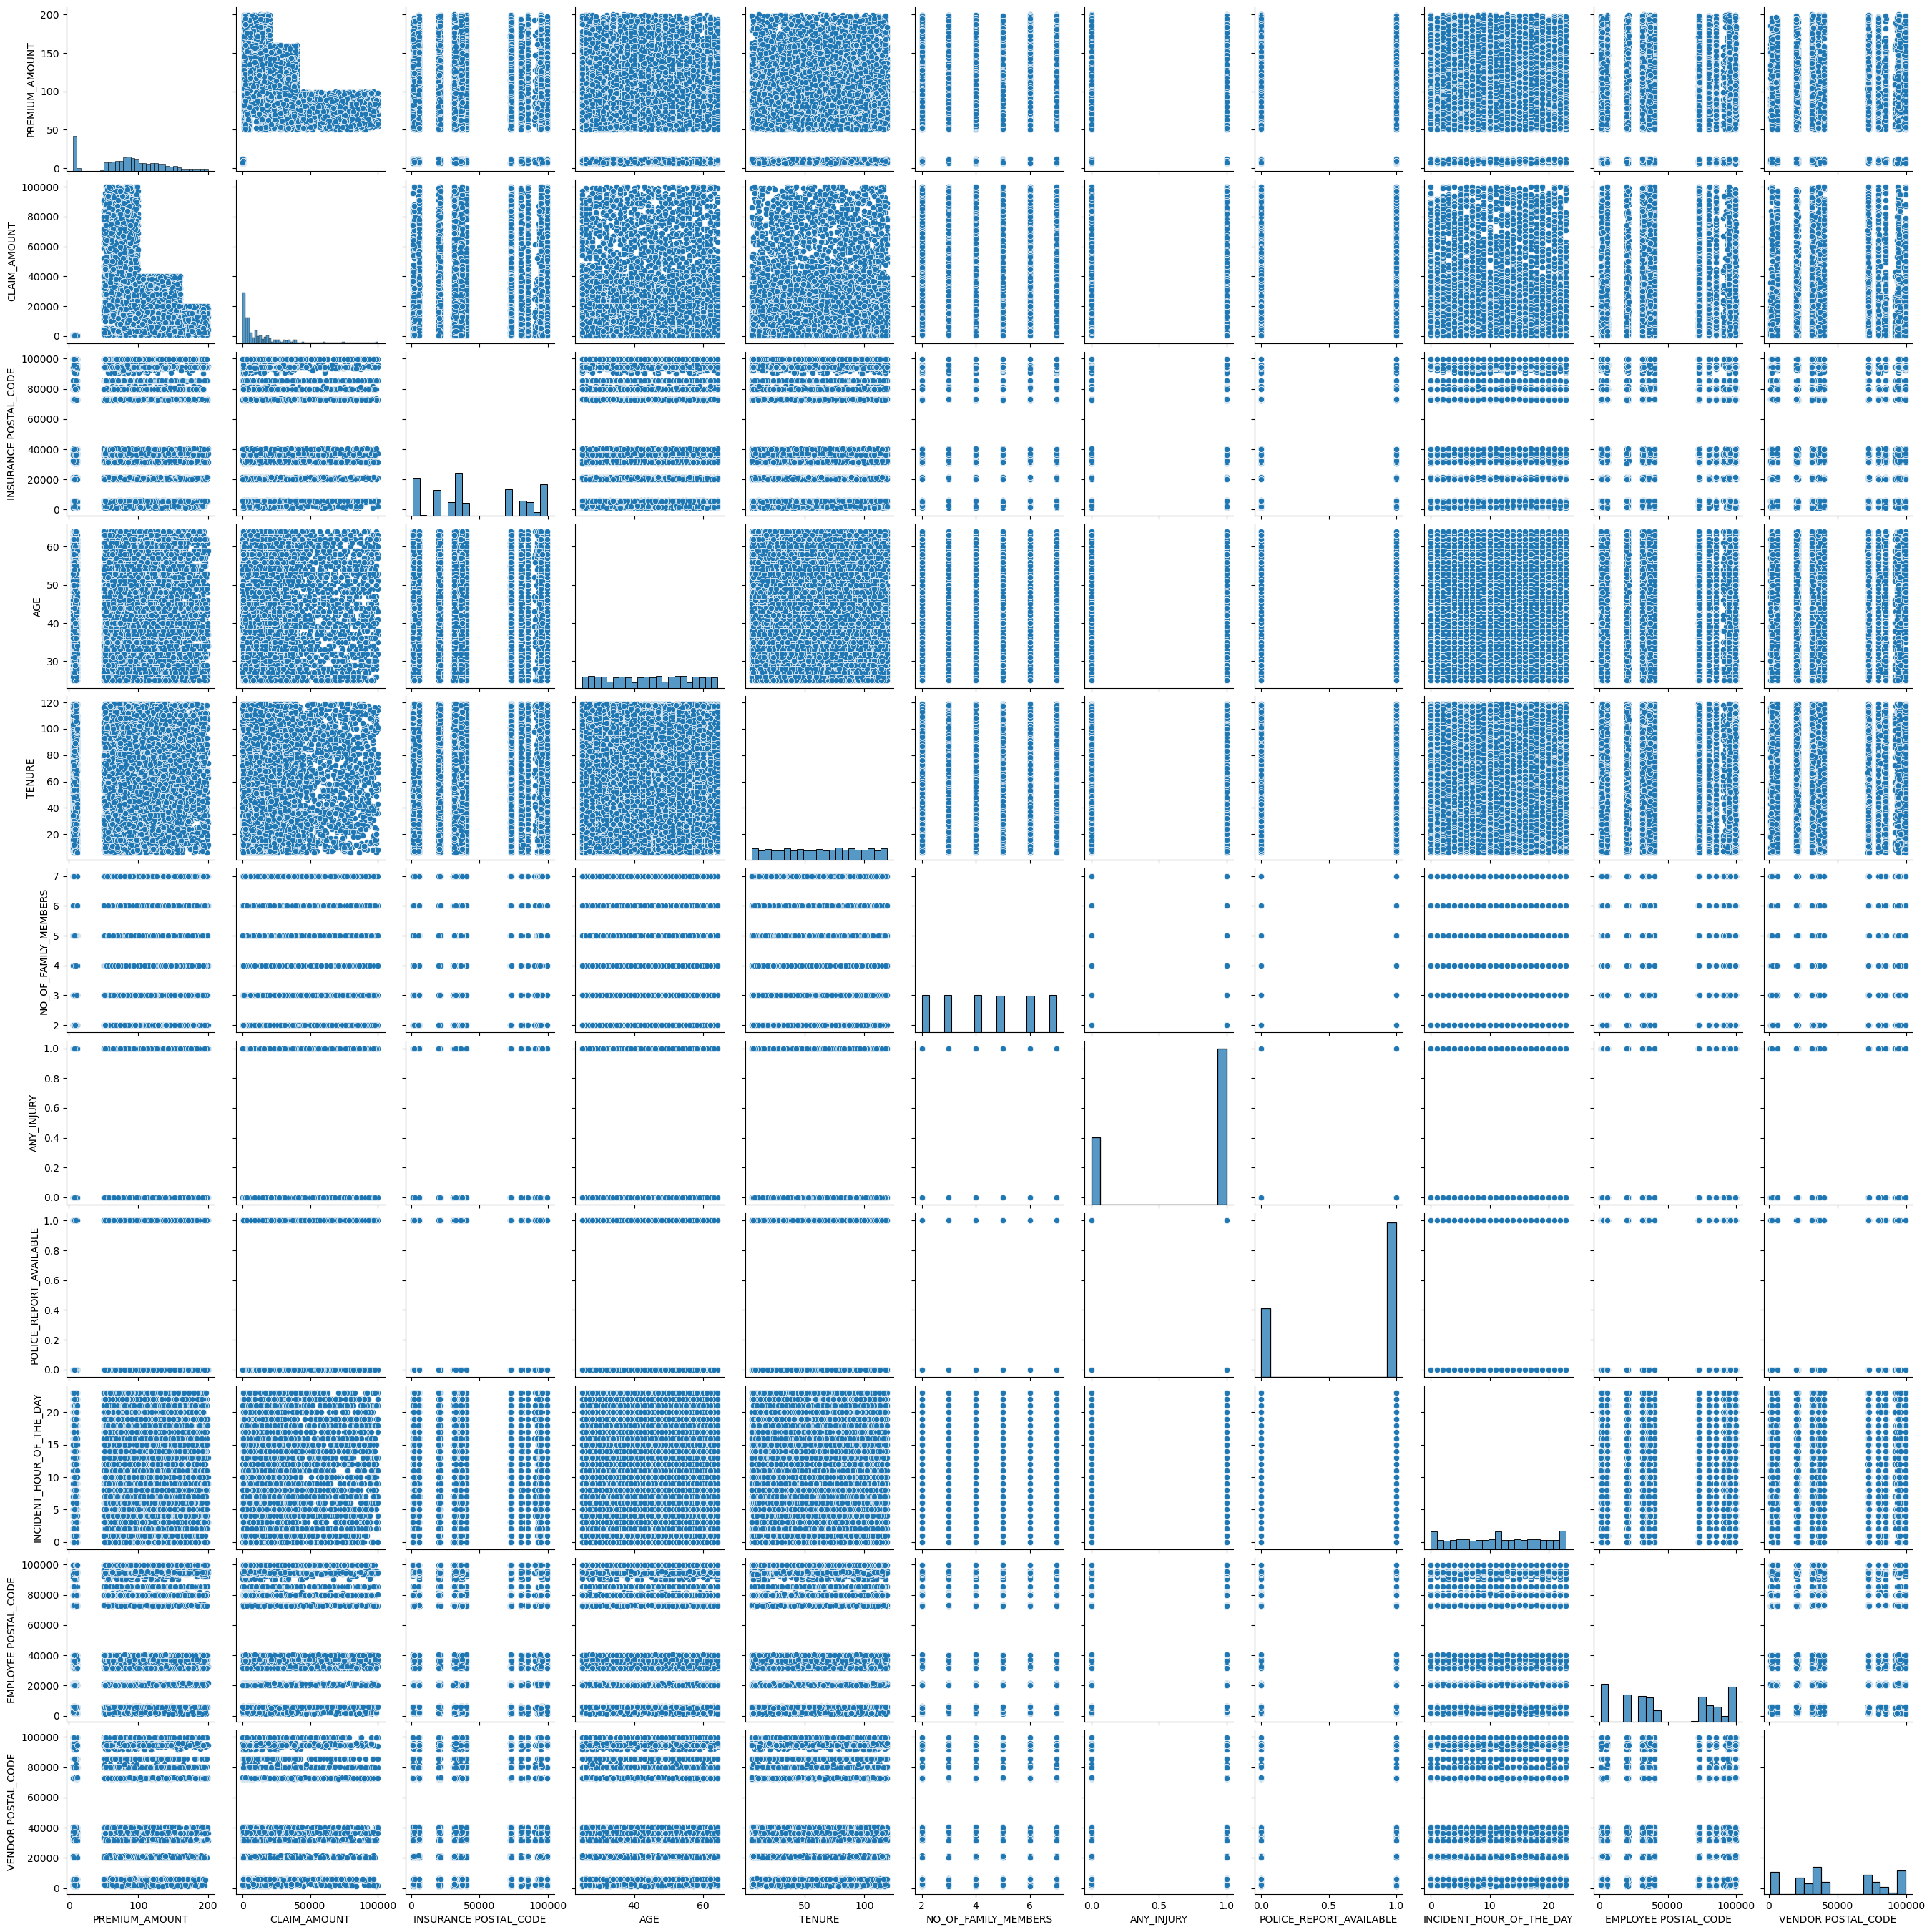

In [53]:
sns.pairplot(ins_claim_fraud)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '9000'),
  Text(1, 0, '54000'),
  Text(2, 0, '13000'),
  Text(3, 0, '42000'),
  Text(4, 0, '500'),
  Text(5, 0, '5000'),
  Text(6, 0, '58000'),
  Text(7, 0, '14000'),
  Text(8, 0, '16000'),
  Text(9, 0, '20000'),
  Text(10, 0, '10000')])

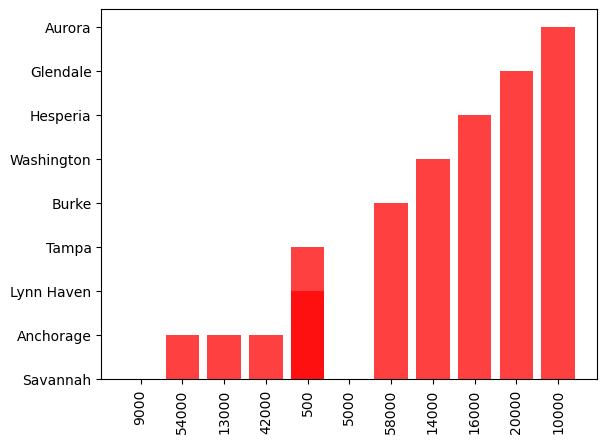

In [55]:
#convert the types of column in pandas dataframe 
# take the first 12 column and 12 rows

claim_amount=ins_claim_fraud["CLAIM_AMOUNT"].head(12).astype(str) 

incident_citiy=ins_claim_fraud["INCIDENT_CITY"].head(12).astype(str) 

plt.bar(claim_amount, incident_citiy, color="r" , alpha=0.75, align="center") 

plt.xticks( rotation=90) 